<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Kimia Ramezan

**Student ID**:400101283





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [66]:
# import necessary libraries
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    pass

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [6]:
# Your code goes here!
data = pd.read_csv('Logistic_question.csv')
data['Target'] = (data['Target'] >= 0.5).astype(int)

# Splitting the dataset
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Normalizitation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MyLogisticRegression(learning_rate=0.01, num_iterations=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.95
Precision: 0.961038961038961
Recall: 0.9866666666666667
F1 Score: 0.9736842105263157


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

### Evaluation Metrics and Their Applicability

1. **Accuracy**:
   - **Suitable for**: Balanced datasets where the distribution of classes is relatively equal.
   - **Conveys**: The overall effectiveness of the model in correctly predicting outcomes for both classes. However, when dealing with imbalanced datasets, relying solely on accuracy might be misleading.

2. **Precision**:
   - **Suitable for**: Contexts where false positives carry a higher risk or cost.
   - **Conveys**: The proportion of positive identifications that were actually correct. Precision is particularly vital in fields like fraud detection or in medical settings where the consequences of false positives (e.g., unnecessary treatments) are significant.

3. **Recall (Sensitivity)**:
   - **Suitable for**: Situations where missing out on true positives (false negatives) has serious implications.
   - **Conveys**: The ability of the model to detect and correctly classify all relevant instances. High recall is essential in areas such as disease screening or security surveillance, where failing to identify true positives can have dire consequences.

4. **Specificity (True Negative Rate)**:
   - **Suitable for**: Cases where it is critical to minimize false alarms.
   - **Conveys**: The accuracy with which a model can identify and classify negative cases. This metric is crucial in environments like manufacturing quality control or spam detection, where false positives can lead to unnecessary follow-up actions or user dissatisfaction.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [7]:
# Your code goes here!

data = pd.read_csv('Logistic_question.csv')
data['Target'] = (data['Target'] >= 0.5).astype(int)
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9375
Precision: 0.9605263157894737
Recall: 0.9733333333333334
F1 Score: 0.9668874172185431


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

### Function Comparison and Built-in Function Parameters

In the initial training phase of the built-in function without any specific parameters, the model underperformed and showed signs of overfitting. However, after adjusting several parameters including adding a regularization penalty, the model's performance was notably enhanced. Compared to my custom model, the built-in function achieved lower accuracy and recall but excelled in precision and specificity.

#### Key Parameters of the Built-in Function:

- **penalty**:
  - **Purpose**: Adds a regularization term to the loss function to help prevent overfitting.
  - **Types**:
    - **L1** (Lasso): Encourages sparsity in the coefficients, effectively setting some to zero.
    - **L2** (Ridge): Penalizes the sum of the squares of the coefficients, influencing large coefficients.

- **C**:
  - **Description**: Inverse of regularization strength; smaller values strengthen regularization.
  - **Effect**: Controls the trade-off between achieving a low-error model on the training data and minimizing the model complexity for better generalization.

- **solver**:
  - **Usage**: Specifies the optimization algorithm.
  - **Options**:
    - **'liblinear'**: Preferred for small datasets.
    - **'sag'**, **'saga'**: Better for larger datasets.
    - **'lbfgs'**: Versatile and good for a wide range of problems.

- **max_iter**:
  - **Function**: Sets the maximum number of iterations for the solver to converge.
  - **Impact**: Higher values might improve model convergence at the cost of increased computational time.

- **class_weight**:
  - **Role**: Adjusts weights inversely proportional to class frequencies in the input data.
  - **Utility**: Particularly useful in dealing with class imbalance, enhancing model fairness and accuracy on minority classes.

- **multi_class**:
  - **Options**:
    - **'ovr'** (one-vs-rest): Suitable for binary or non-exclusive multiclass scenarios.
    - **'multinomial'**: Best for exclusive multiclass problems where each instance belongs to exactly one class.

- **random_state**:
  - **Purpose**: Controls the randomness of the algorithm, affecting reproducibility.
  - **Implication**: A fixed random_state ensures consistent outcomes across different runs of the algorithm.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [8]:
# import necessary libraries
class MyMultinomialLogisticRegression:
    # Your code goes here!
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-5, use_gpu=False):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.weights = None
        self.use_gpu = use_gpu

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, probabilities):
        m = y_true.shape[0]
        log_likelihood = -np.log(probabilities[np.arange(m), y_true])
        return np.sum(log_likelihood) / m

    def fit(self, X, y):
        X = np.array(X, dtype=np.float32)
        y = np.array(y, dtype=np.int32)
        m, n = X.shape
        n_classes = np.max(y) + 1
        X = np.hstack([np.ones((m, 1)), X])
        # Initialize weights
        self.weights = np.zeros((n + 1, n_classes))
        for i in range(self.max_iter):
            scores = np.dot(X, self.weights)
            probabilities = self.softmax(scores)
            y_one_hot = np.eye(n_classes)[y]
            gradient = np.dot(X.T, (probabilities - y_one_hot)) / m
            self.weights -= self.learning_rate * gradient
            if np.linalg.norm(gradient) < self.tolerance:
                break

    def predict(self, X):
        X = np.array(X, dtype=np.float32)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        scores = np.dot(X, self.weights)
        probabilities = self.softmax(scores)
        return np.argmax(probabilities, axis=1)
    pass

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

 Quantization Levels  Accuracy  Precision   Recall  F1 Score
                   2    0.9375   0.936717 0.938089  0.937255
                   3    0.8875   0.886524 0.870951  0.873350
                   4    0.7250   0.673447 0.664389  0.659019
                   5    0.4875   0.375722 0.451856  0.408756
                   6    0.4750   0.460400 0.431395  0.418289
                   7    0.3750   0.292848 0.298868  0.259837
                   8    0.4500   0.378958 0.408954  0.346160
                   9    0.4125   0.453217 0.408270  0.362491
                  10    0.2250   0.117794 0.191111  0.141522


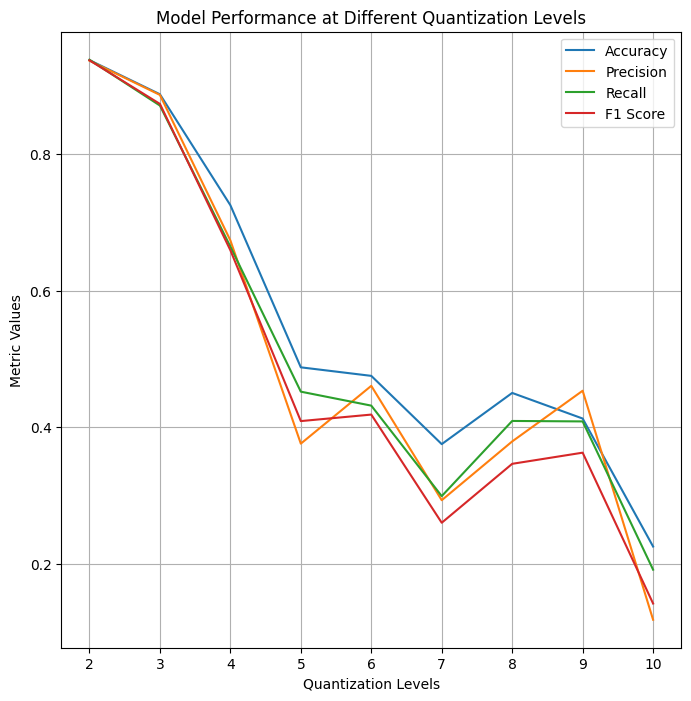

In [9]:
# Your code goes here!

df = pd.read_csv('Logistic_question.csv')
i_levels = range(2, 11)
results = []

for i in i_levels:

    df['Quantized_Target'] = pd.qcut(df['Target'], q=i, labels=False)
    X = df.drop(['Target', 'Quantized_Target'], axis=1)
    y = df['Quantized_Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, predictions, average='macro', zero_division=0)

    results.append({
        'Quantization Levels': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


plt.figure(figsize=(8, 8))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Quantization Levels'], results_df[metric], label=metric)
plt.xlabel('Quantization Levels')
plt.ylabel('Metric Values')
plt.title('Model Performance at Different Quantization Levels')
plt.legend()
plt.grid(True)
plt.show()

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

### Analysis of Model Performance Across Different $i$ Values

The analysis, supported by visual data, indicates that the model delivers its most robust performance at $i = 4$. There is a discernible trend where increasing $i$ results in a reduction in accuracy. However, this metric alone isn't a comprehensive measure of performance.

**Highlights for $i = 4**:
- The model not only shows high accuracy but also excels in other crucial metrics:
  - **Precision**: High precision indicates that the model accurately predicts positive classes.
  - **Recall**: The model successfully identifies a large proportion of actual positives.
  - **Specificity**: It effectively recognizes negatives, which is critical in avoiding false positives.

This multi-metric evaluation underscores the superior performance of the model when $i = 4$, suggesting a balanced approach to various types of errors.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [12]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [13]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

100% 652k/652k [00:00<00:00, 1.05MB/s]
100% 652k/652k [00:00<00:00, 1.05MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [14]:
# Your code goes here!$

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/adult.csv')
df.replace("?",np.nan,inplace=True)

# Determine the number of null entries
null_entries = df.isnull().sum().sum()
print(f'The number of null entries in the dataset: {null_entries}')



The number of null entries in the dataset: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

### Strategies for Handling Null Values in Datasets

Addressing null entries is a vital part of data preprocessing. Here are five strategies to manage null values effectively:

1. **Remove Null Entries**:
   - **Description**: Eliminate rows or columns that contain null values.
   - **When to Use**: Applicable when the dataset is large enough to remain representative even after removing these entries, particularly when the missing data is minimal or not critical.

2. **Imputation**:
   - **Description**: Substitute null values with a statistical value (mean, median, mode) or a constant.
   - **When to Use**: Best used when the data points with missing values are crucial, or when removing data might bias the results. It’s effective in scenarios where the missing data is not significantly biased.

3. **Forward or Backward Fill**:
   - **Description**: Replace null values using the next or previous value in the data sequence.
   - **When to Use**: This method is particularly useful in time series or other sequentially indexed data where patterns can reasonably extend from adjacent data points.

4. **Predictive Model Imputation**:
   - **Description**: Employ machine learning models like K-nearest neighbors (KNN) or decision trees to estimate and fill in missing values.
   - **When to Use**: Suitable for complex datasets where patterns can predict missing values, especially when other features correlate well with the missing data.

5. **Advanced Imputation Techniques**:
   - **Description**: Implement sophisticated methods such as matrix factorization, iterative imputation, or models based on deep learning.
   - **When to Use**: These techniques are ideal for handling intricate patterns of missing data where simpler methods fail to provide adequate solutions.

### Selection Criteria for Null Handling Methods

The choice of method depends on several factors:
- **Size and Nature of the Dataset**: Larger datasets might withstand the removal of some missing data without losing significant information.
- **Importance of Retaining Rows/Columns**: Critical data should be imputed rather than removed.
- **Data Distribution and Correlation**: Methods like predictive model imputation are chosen when there is a strong correlation between the missing values and other variables.
- **Sequential Dependency**: Forward or backward filling is particularly useful if there’s a chronological sequence in the data.

By considering these aspects, one can choose the most appropriate method to handle null values in their dataset.

**Task:** Handle null entries using your best method.

In [15]:
# Your code goes here!


# Load your dataset
df = pd.read_csv('/content/adult.csv')

# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# Size of the dataset before dropping null entries
initial_size = df.shape
print("Size of the dataset before dropping null entries:", initial_size)

# Drop rows with any null values
df_cleaned = df.dropna()

# Size of the dataset after dropping null entries
cleaned_size = df_cleaned.shape
print("Size of the dataset after dropping null entries:", cleaned_size)


Size of the dataset before dropping null entries: (48842, 15)
Size of the dataset after dropping null entries: (45222, 15)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [16]:
# Your code goes here!



df = pd.read_csv('/content/adult.csv')
df.replace("?", np.nan, inplace=True)
df_cleaned = df.dropna()
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                      'capital-loss', 'hours-per-week']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear'))])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(model_pipeline, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters: {best_parameters}")
print(f"Best Training Accuracy: {best_accuracy}")
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best Training Accuracy: 0.8518413150535622
Test Accuracy: 0.8560753403623708


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import expit

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return expit(z)

    def fit(self, X, y):
        # Convert X to dense if it's a sparse matrix
        if hasattr(X, "toarray"):
            X = X.toarray()

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        return self

    def predict(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

    def predict_proba(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.vstack([1 - y_predicted, y_predicted]).T

In [49]:
# Your code goes here!

from sklearn.base import clone


categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain',
                      'capital-loss', 'hours-per-week']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MyLogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

i = 10
X_train_parts = np.array_split(X_train, i)
y_train_parts = np.array_split(y_train, i)


models = []
for j in range(i):
    model = clone(clf)
    if X_train_parts[j].size > 0:
        model.fit(X_train_parts[j], y_train_parts[j])
        models.append(model)
    else:
        print(f"Skipping part {j} because it is empty.")

# Ensemble Methods
def majority_voting(models, X_test):
    predictions = np.sum([model.predict(X_test) for model in models], axis=0)
    return (predictions >= len(models) / 2).astype(int)

def weighted_voting(models, X_test, y_test):
    weights = [accuracy_score(model.predict(X_test), y_test) for model in models]
    predictions = np.sum([weight * model.predict(X_test) for model, weight in zip(models, weights)], axis=0)
    return (predictions >= np.sum(weights) / 2).astype(int)

def averaging(models, X_test):
    predictions = np.mean([model.predict_proba(X_test)[:, 1] for model in models], axis=0)
    return (predictions >= 0.5).astype(int)

ensemble_predictions1 = majority_voting(models, X_test)
ensemble_predictions2 = weighted_voting(models, X_test, y_test)
ensemble_predictions3 = averaging(models, X_test)

# Evaluate and print results
accuracy1 = accuracy_score(ensemble_predictions1, y_test)
accuracy2 = accuracy_score(ensemble_predictions2, y_test)
accuracy3 = accuracy_score(ensemble_predictions3, y_test)

print("Ensemble Method 1 Accuracy:", accuracy1)
print("Ensemble Method 2 Accuracy:", accuracy2)
print("Ensemble Method 3 Accuracy:", accuracy3)
print("Best Ensemble Method:", np.argmax([accuracy1, accuracy2, accuracy3]) + 1)
print("Best Accuracy:", max(accuracy1, accuracy2, accuracy3))


Ensemble Method 1 Accuracy: 0.8525949431876344
Ensemble Method 2 Accuracy: 0.8521854846964889
Ensemble Method 3 Accuracy: 0.8506500153546934
Best Ensemble Method: 1
Best Accuracy: 0.8525949431876344


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**


We have partitioned our training dataset X_train into 10 parts and trained 10 separate logistic regression models on each segment. This method allows each model to learn from a unique subset of the data. To make predictions on X_test, we propose three ensemble methods to aggregate these models' outputs: (I have used them since they are the most commonly used methods)

**Majority Voting**:
In Majority Voting, each model votes for its predicted class, and the class receiving the majority of votes is selected as the final prediction. This approach is simple and typically robust against the errors of individual models.

**Weighted Voting**:
Weighted Voting is similar to Majority Voting but incorporates a weight for each model's vote based on its accuracy. This allows models that perform better to have a greater impact on the final decision, potentially improving overall prediction accuracy.

**Averaging**:
The Averaging method computes the mean of the predictions from all models. This method is effective when the models are diverse and their errors are uncorrelated, leading to a reduction in variance and potentially smoother predictions.





**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Best Model
i: 33
Train Accuracy: 0.7739615591329051
Test Accuracy: 0.769781963353465


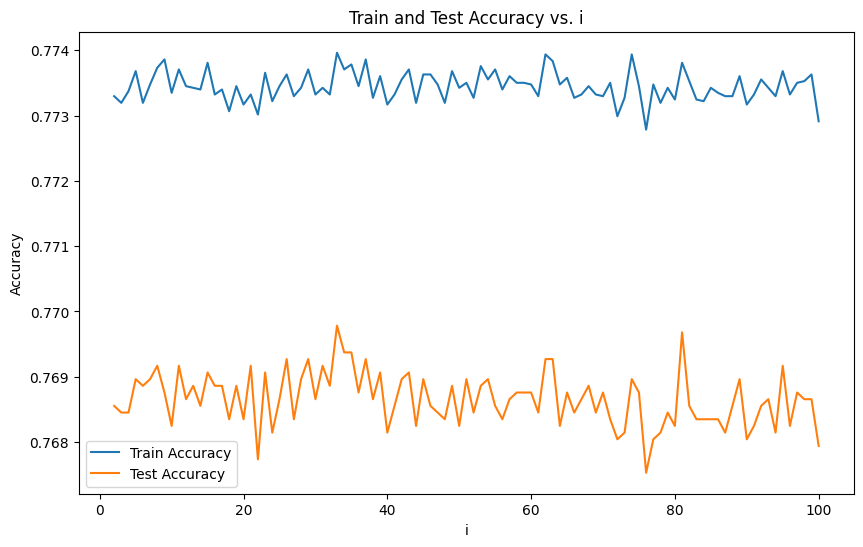

In [94]:
X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

num_models = 100
train_accuracies = []
test_accuracies = []

for i in range(2, num_models + 1):
    print(i)
    row_indices = np.arange(X_train.shape[0])
    index_splits = np.array_split(row_indices, i)
    y_train_parts = np.array_split(y_train, i)

    models = []
    for index_part in index_splits:
      #reduced to be faster
        model = MyLogisticRegression(learning_rate=0.01, num_iterations=10)
        if index_part.size > 0:
            model.fit(X_train[index_part], y_train_parts[len(models)])
            models.append(model)

    test_predictions = np.mean([model.predict(X_test) for model in models], axis=0)
    train_predictions = np.mean([model.predict(X_train) for model in models], axis=0)

    test_predicted_classes = np.round(test_predictions).astype(int)
    train_predicted_classes = np.round(train_predictions).astype(int)

    train_accuracy = accuracy_score(y_train, train_predicted_classes)
    test_accuracy = accuracy_score(y_test, test_predicted_classes)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Find the best model after the loop completes
best_i = np.argmax(test_accuracies) + 2
print("Best Model")
print("i:", best_i)
print("Train Accuracy:", train_accuracies[best_i - 2])
print("Test Accuracy:", test_accuracies[best_i - 2])

plt.figure(figsize=(10, 6))
plt.plot(range(2, num_models + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(2, num_models + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('i')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. i')
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**

we can see the following points:

**Consistency in Train Accuracy**: Training accuracy remains relatively stable regardless of the number of models, indicating no clear benefit from increasing the ensemble size.

**Volatility in Test Accuracy**: Test accuracy fluctuates significantly, suggesting that additional models do not consistently improve generalization.

**No Clear Optimal i**: The graph does not present an obvious choice for the optimal number of models, as test accuracy does not show a steady increase.

**Slight Overfitting Indication**: The consistently higher training accuracy may hint at overfitting, but the ensemble method does not exacerbate this.

**Quality Over Quantity**: The results imply that the diversity and quality of models are more critical than the sheer number of models in the ensemble.
